# Entrega 3 Proyecto Final – Primeros Análisis<br>
#### Integrantes:
- Daniel Cea
- Cristobal Strange
- Antonia Painen
- Aleksander Humenyi

### 2.1. Definición del Problema

En los últimos años, se ha registrado un notable incremento en los precios de las viviendas, lo que ha generado dificultades crecientes para que las personas puedan acceder a una propiedad. Esta situación ha llevado a que los potenciales compradores deban considerar más factores al momento de elegir una vivienda, con el fin de optimizar su inversión.

El objetivo de este proyecto es proporcionar herramientas que ayuden a quienes están interesados en adquirir una vivienda en la Región Metropolitana. Utilizando análisis de datos, se busca generar información valiosa que permita a los compradores tomar decisiones más informadas y maximizar el valor de su compra en un contexto de mercado con precios al alza.

En esta entrega del proyecto, nos enfocaremos en describir en detalle los datos disponibles, los cuales incluyen información sobre las viviendas en venta en la Región Metropolitana, y presentaremos un plan preliminar de análisis que será extendido en las fases siguientes. El análisis abarcará tanto características de ciertos patrones de precios, para identificar tendencias que puedan beneficiar a los futuros compradores.

##### *¿Qué estrategias pueden emplear los compradores para maximizar el valor de su compra de vivienda en un mercado con precios en alza?*



### 2.2. Impacto del Trabajo

Dado el constante aumento en los precios de las viviendas, resulta cada vez más crucial para los compradores tomar decisiones informadas al momento de adquirir una propiedad. El mercado inmobiliario actual presenta desafíos significativos, especialmente en áreas urbanas donde la oferta es limitada y la demanda sigue creciendo. Por ello, conocer los factores que influyen en los precios y analizar las características de las viviendas disponibles se vuelve esencial para maximizar el valor de la inversión. En este contexto, contar con información precisa y actualizada puede marcar la diferencia entre una compra exitosa y una que no satisfaga las expectativas a largo plazo.


### 2.3. Datos
Los datos que elegimos para el proyecto es sobre casas que se encuentran a la venta en la Región Metropolitana, estos datos fueron extraídos mediante web scraping a una página de publicación de viviendas en venta, [Chile Propiedades](https://chilepropiedades.cl), y los datos extraídos de la página los obtuvimos  [aquí.](https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023)

Este dataset es relevante para el análisis del mercado inmobiliario, ya que refleja características importantes para los compradores, como ubicación, precio, tamaño de las propiedades y cantidad de baños y habitaciones. Con esto tenemos una amplia gama de factores clave que influyen en los precios, permitiendo un análisis exhaustivo del comportamiento del mercado en un área de alta demanda y constante alza en los precios de vivienda.

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [78]:
df_propiedades = pd.read_csv("Data/2023-07-18 Propiedades Web Scrape.csv")
df_propiedades = df_propiedades[["Price_CLP","Comuna","Dorms","Baths","Built Area","Total Area","Parking","Ubicacion","Realtor"]]

df_propiedades.describe()

,Price_CLP,Dorms,Baths,Built Area,Total Area,Parking
count,9.291000e+03,9202.000000,9138.000000,9.013000e+03,9057.000000,6371.000000
mean,3.925134e+08,4.027059,2.749726,6.091603e+03,890.977145,2.682467
std,4.036515e+08,1.661439,1.478629,5.274367e+05,11291.403141,2.221227
min,3.700000e+07,1.000000,1.000000,1.000000e+00,1.000000,1.000000
25%,1.282067e+08,3.000000,2.000000,9.000000e+01,134.000000,1.000000
50%,2.345135e+08,4.000000,3.000000,1.310000e+02,230.000000,2.000000
75%,5.267534e+08,5.000000,3.000000,2.090000e+02,480.000000,3.000000
max,4.870665e+09,35.000000,29.000000,5.000000e+07,720000.000000,26.000000


In [79]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   9291 non-null   int64  
 1   Comuna      9291 non-null   object 
 2   Dorms       9202 non-null   float64
 3   Baths       9138 non-null   float64
 4   Built Area  9013 non-null   float64
 5   Total Area  9057 non-null   float64
 6   Parking     6371 non-null   float64
 7   Ubicacion   9291 non-null   object 
 8   Realtor     8125 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 653.4+ KB


In [80]:
df_propiedades.sort_values("Price_CLP")

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor
4144,37000000,SanBernardo,2.0,1.0,42.0,42.0,2.0,CerroCantillanaesquinaCondell,Urbalia
3539,38000000,PuenteAlto,2.0,1.0,65.0,60.0,NaN,Laserena/canaljardinalto,Unne
8261,38500000,PuenteAlto,3.0,2.0,80.0,80.0,NaN,Deltranque/elfrutoote.,Procasa Adrián Ulloa Propiedades
3712,39000000,Lampa,2.0,1.0,42.0,NaN,2.0,Pje.ElSalvador686,NaN
5686,39000000,Colina,2.0,1.0,55.0,63.0,NaN,Casacon2°PisoenConjuntoElEstero,Corretajes Prosal
...,...,...,...,...,...,...,...,...,...
2382,3607900000,Santiago,10.0,8.0,NaN,600.0,NaN,TucapelJiménez,NaN
9288,3788295000,LasCondes,5.0,7.0,460.0,4925.0,8.0,CaminoLasFlores/CaminoPiedraRoja,Tsi Property
8951,3968690000,Vitacura,NaN,NaN,5000.0,5000.0,NaN,Locurro,Tsi Property
6659,4040848000,LoBarnechea,5.0,5.0,600.0,2800.0,NaN,Dehesacentral,Berrios Zegers


In [81]:
df_propiedades[df_propiedades.isnull().any(axis=1)]

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor
1,130000000,Buin,5.0,3.0,150.0,190.0,2.0,Villaseca,NaN
9,145000000,SanJoaquín,2.0,1.0,70.0,140.0,NaN,Ríoñuble,Royalrealty Spa
13,400000000,SanMiguel,7.0,3.0,220.0,270.0,2.0,AvenidaSalesianos,NaN
15,188000000,Santiago,4.0,2.0,131.0,77.0,NaN,RafaelSotomayor381,Jlipropiedades
16,210000000,Maipú,3.0,2.0,110.0,133.0,1.0,Islachica,NaN
...,...,...,...,...,...,...,...,...,...
9281,80672644,PuenteAlto,2.0,1.0,NaN,76.0,2.0,ClaudioArrau,Margarita Leiva Catalan
9284,269185419,PuenteAlto,4.0,3.0,NaN,240.0,3.0,CondominioJardinesdeLasVizcachas,Margarita Leiva Catalan
9285,162355500,Lampa,3.0,3.0,NaN,500.0,2.0,Batuco,Margarita Leiva Catalan
9287,250000000,PuenteAlto,4.0,2.0,196.0,750.0,NaN,manuelrodriguez,Margarita Leiva Catalan


In [82]:
df_propiedades[["Dorms", "Baths", "Built Area", "Total Area", "Parking"]] = \
df_propiedades[["Dorms", "Baths", "Built Area", "Total Area", "Parking"]].fillna(0)


In [83]:
df_propiedades[df_propiedades.isnull().any(axis=1)]

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor
1,130000000,Buin,5.0,3.0,150.0,190.0,2.0,Villaseca,NaN
13,400000000,SanMiguel,7.0,3.0,220.0,270.0,2.0,AvenidaSalesianos,NaN
16,210000000,Maipú,3.0,2.0,110.0,133.0,1.0,Islachica,NaN
22,120000000,LaFlorida,4.0,2.0,101.0,140.0,2.0,Avenidacoronelytrinidad,NaN
23,200000000,SanBernardo,3.0,1.0,0.0,0.0,1.0,Libertad,NaN
...,...,...,...,...,...,...,...,...,...
8949,520980760,Peñaflor,8.0,6.0,354.0,5300.0,3.0,Peñaflor,NaN
9243,537577100,Colina,3.0,3.0,160.0,600.0,2.0,AvenidaJoseRabat,NaN
9248,125000000,EstaciónCentral,3.0,1.0,80.0,199.0,1.0,Gloria472,NaN
9257,143594420,Buin,3.0,3.0,72.0,172.0,3.0,VictorVeraLetelier,NaN


In [84]:
df_propiedades[["Realtor"]] = \
df_propiedades[["Realtor"]].fillna("")

In [85]:
df_propiedades[df_propiedades.isnull().any(axis=1)]

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor


In [86]:
df_propiedades = df_propiedades.sort_values(by="Built Area", ascending=False)
df_propiedades["Price_CLP"] = df_propiedades["Price_CLP"].map(lambda x:x / 1000000)


In [87]:
df_propiedades.head()

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor
1464,155.13970,Paine,0.0,0.0,50000000.0,5000.0,0.0,18deseptiemrecohuelquem,Corredores Asociados
313,257.96485,Paine,6.0,3.0,2710000.0,5400.0,5.0,Hermosaparcelaconpiscinaenpaine,Movahome Corredores Integrados
717,130.00000,Cerrillos,3.0,1.0,120000.0,300000.0,2.0,Av.LosCerrillos639,orietta alvarez lobos
2611,90.00000,Renca,3.0,2.0,100350.0,80980.0,1.0,CampañadeTacna1595,
2228,2164.74000,SanJosédeMaipo,14.0,0.0,60000.0,60000.0,0.0,Casamaipo,Invictus Spa


<AxesSubplot:xlabel='Price_CLP', ylabel='Count'>

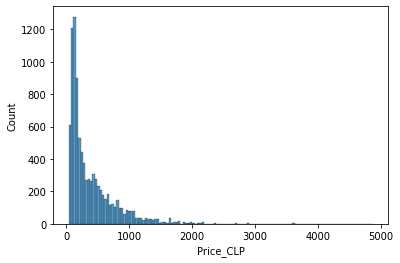

In [88]:
sns.histplot(df_propiedades["Price_CLP"], stat="count")

c:\Users\Nico\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_CLP'>

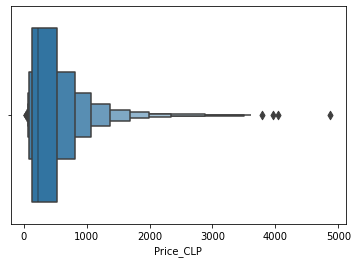

In [89]:
sns.boxenplot(df_propiedades["Price_CLP"])

c:\Users\Nico\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dorms'>

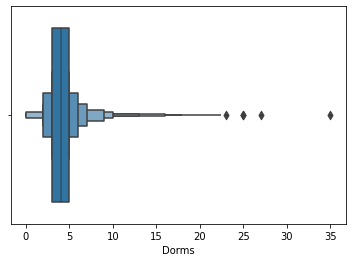

In [90]:
sns.boxenplot(df_propiedades["Dorms"])

c:\Users\Nico\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Baths'>

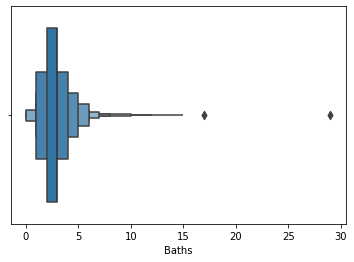

In [91]:
sns.boxenplot(df_propiedades["Baths"])

c:\Users\Nico\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Built Area'>

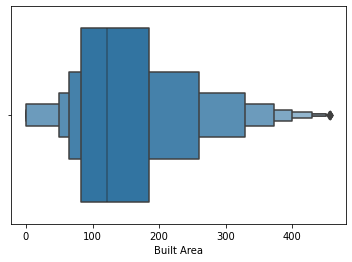

In [92]:
sns.boxenplot(df_propiedades[df_propiedades["Built Area"] < df_propiedades["Built Area"].quantile(.95)]["Built Area"]) # Sin considerar unos outliers grandísimos que dejaban casi inútil el gráfico

c:\Users\Nico\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parking'>

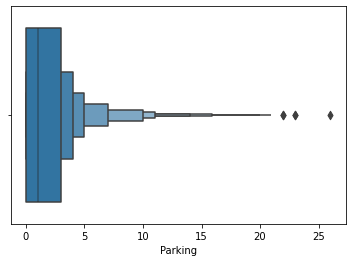

In [93]:
sns.boxenplot(df_propiedades["Parking"])

In [100]:
features = ["Dorms", "Baths", "Built Area", "Total Area", "Parking"]
target = "Price_CLP"
X = df_propiedades[features]
y = df_propiedades[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
y_pred = model.predict(X_test)

In [102]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 207.38673925328158
Mean Absolute Error (MAE): 111.08681575398907
R^2 Score: 0.7446716148837185


In [106]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred_LR = model_LR.predict(X_test)

In [108]:
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
mae_LR = mean_absolute_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

# Mostrar métricas
print("Resultados del modelo de regresión lineal:")
print(f"RMSE (Root Mean Squared Error): {rmse_LR}")
print(f"MAE (Mean Absolute Error): {mae_LR}")
print(f"R^2 (Coeficiente de determinación): {r2_LR}")


Resultados del modelo de regresión lineal:
RMSE (Root Mean Squared Error): 339.6664090709519
MAE (Mean Absolute Error): 200.09285311440945
R^2 (Coeficiente de determinación): 0.31507608277576427


In [110]:
# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame({"Característica": features, "Coeficiente": model_LR.coef_})
print("\nCoeficientes del modelo:")
print(coeficientes)


Coeficientes del modelo:
  Característica  Coeficiente
0          Dorms    11.960616
1          Baths   136.243598
2     Built Area    -0.000064
3     Total Area     0.001095
4        Parking    36.135054


El principal problema que tuvimos fue al limpiar los datos, es por esto que para esta entrega decidimos ser más exhaustivos y precavidos, por lo que rellenamos los datos nulos, las columnas de datos numericos con **0** y las columnas con datos str con **""**. 

# 2.4 Conclusión

Tenemos Precio, dormitorio baño, aŕea construida y estacionamientos, pero sólo de casas, no de departamentos, además, de acuerdo con la documentación de los datos estas casas sólo son casas usadas, aunque probablemente no sea el caso de todas.

Hay 9291 registros con un precio válido. 

Los atributos no son independientes, ya que realmente el precio de una propiedad está muy relacionado con el indicador del área, y al tener más área lógicamente tendrá mas espacio para alojar más gente, que necesitará a su vez donde dormir y suplir sus necesidades.


## ¿Cómo cambió el mundo después del trabajo?

El impacto de este trabajo se refleja en lo siguiente:
- Mejor comprensión del mercado inmobiliario, con el análisis se lográ una visón más clara de las principales caracteristicas de las viviendas. 
- Decisiones más informadas, para inversionistas y para simples compradores, pueden utilizar este análisis para estudiar los valores y oportunidades de viviendas para maximizar sus ganancias.
- Primer acercamiento a un análisis más profundo, luego de comprender esto, se puede continuar con estudios más profundos y especificos.


------



### 2.5. Primera Respuesta al Problema o Pregunta

- ¿Por qué era adecuado el trabajo realizado para mi proyecto?

La finalidad del trabajo realizado es comprender el mercado inmobiliario actual en chile y poder tomar decisiones de manera informada. El analisis inicial permite visualizar de mejor manera ciertas variables y caracteristicas de las viviendas y con eso comprender tendencias y las ofertas existentes.
- ¿Qué limitaciones tiene mi análisis? ¿Cómo se podría mejorar o solventar algunas de esas limitaciones?

Las principales limitaciones vienen de la mano de los datos, ya que actuelmente se está trabajando con una base de datos, proveniente de una sola pagina web, por lo que puede haber información y ofertas de viviendas que estamos dejando de lado. También se puede perder fluctuaciones de precio a lo largo del tiempo, que es una variable clave al momento de toamr una decisión de inversión de gran magnitud. Finalmente no se están considerando factores como "servicios cercadnos", "áreas verdes", "accesibilidad", etc. 

La manera de mitigar estos problemas podrías ser, realizar analisis geoespacial, junto con complemntear los datos con otras paginas web.

- ¿Necesito más datos para mi proyecto?

De todas maneras el aumento de datos puede ser beneficioso para el proyecto, esto permite mejores correlaciones y aporta a una mejor comprensión del problema. Puede tener un lado negativo, que sería el aumento en el tiempo de analisis, pero siempre será más relevante un mejor y más profundo analisis, antes que uno superficial.

- ¿Necesito más análisis para mi proyecto?

Como comentamos anteriormente, se podría profundizar el analisis con un estudio zonal de las viviendas, junto con un estudio de las fluctuaciones de precios en el tiempo. 